In [2]:
from sklearn.externals import joblib
import pandas as pd


In [3]:
test_indices = pd.read_csv('./test_indices.csv')

In [4]:
test_indices.head()

,Unnamed: 0,0
0,0,55463
1,1,56901
2,2,25599
3,3,17475
4,4,44847


In [5]:
test_indices = test_indices.drop(['Unnamed: 0'], axis=1)

In [6]:
test_indices = test_indices.values

In [7]:
X_test = pd.read_csv('X_test.csv',na_filter=False)

In [8]:
X_test = X_test.drop(columns=['Unnamed: 0'])


In [9]:
X_test.head()

,0,1,2,3,4,5,6,7,8,9,...,34990,34991,34992,34993,34994,34995,34996,34997,34998,34999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
X_test = X_test.values

In [11]:
df = pd.read_csv('concated_dataset.csv')

In [12]:
df.head()

,Unnamed: 0,content,label
0,68600,新华社 照片 罗马 2017 年 5 月 20 日 n 体育 4 网球 意大利 公开赛 纳达...,1
1,57990,新华社 照片 外代 2017 年 5 月 11 日 n 外代 二线 庆祝 卫塞节 n5 月 ...,1
2,31908,新华社 照片 外代 2017 年 4 月 18 日 n 外代 二线 齐 波斯 马戏团 n4 ...,1
3,21077,新华社 照片 黔东南 贵州 2017 年 4 月 8 日 n 贵州 黎平 侗乡 秀 瑜伽 n...,1
4,11318,新华社 照片 外代 2017 年 3 月 31 日 n 外代 二线 南非 时装周 太阳神 品...,1


In [13]:
df.index = df['Unnamed: 0'].values


In [14]:
df.head()

,Unnamed: 0,content,label
68600,68600,新华社 照片 罗马 2017 年 5 月 20 日 n 体育 4 网球 意大利 公开赛 纳达...,1
57990,57990,新华社 照片 外代 2017 年 5 月 11 日 n 外代 二线 庆祝 卫塞节 n5 月 ...,1
31908,31908,新华社 照片 外代 2017 年 4 月 18 日 n 外代 二线 齐 波斯 马戏团 n4 ...,1
21077,21077,新华社 照片 黔东南 贵州 2017 年 4 月 8 日 n 贵州 黎平 侗乡 秀 瑜伽 n...,1
11318,11318,新华社 照片 外代 2017 年 3 月 31 日 n 外代 二线 南非 时装周 太阳神 品...,1


In [15]:
df = df.drop(df.columns[0],axis =1)

In [16]:
df.head()

,content,label
68600,新华社 照片 罗马 2017 年 5 月 20 日 n 体育 4 网球 意大利 公开赛 纳达...,1
57990,新华社 照片 外代 2017 年 5 月 11 日 n 外代 二线 庆祝 卫塞节 n5 月 ...,1
31908,新华社 照片 外代 2017 年 4 月 18 日 n 外代 二线 齐 波斯 马戏团 n4 ...,1
21077,新华社 照片 黔东南 贵州 2017 年 4 月 8 日 n 贵州 黎平 侗乡 秀 瑜伽 n...,1
11318,新华社 照片 外代 2017 年 3 月 31 日 n 外代 二线 南非 时装周 太阳神 品...,1


In [17]:
model_LinearSVC = joblib.load('LinearSVC.pkl')    

In [18]:
while True:
    input_content = input("Please input a text's index(0-{}), i will judge whether the text is released from '新华社' or '新华网' or not, "
                          "\nenter 'exit' to end the programe:".format(len(X_test)))
    if input_content == 'exit':
        break

    elif ((input_content.isdigit() == False) or (int(input_content) >= len(X_test))) and (input_content != 'exit'):
        print('Please input integer between 0-{}'.format(len(X_test)))
        print('\n')

    else:
        input_content = int(input_content)
        print('The text you choosed is:')
        num = test_indices[input_content][0]
        print(num)
        print(df['content'].iloc[num])
        res = int(model_LinearSVC.predict(X_test[[input_content]]))

        if res == 1:
            print("Predict answer: the text you choosed was released by '新华社' or '新华网'")
            print("The ture label is {}".format(df['label'].iloc[num]))
            print('\n')
            
        elif res == 0:
            print("Predict answer: the text you choosed was released by other organization")
            print("The ture label is {}".format(df['label'].iloc[num]))
            print('\n')

Please input a text's index(0-3000), i will judge whether the text is released from '新华社' or '新华网' or not, 
enter 'exit' to end the programe:56
The text you choosed is:
28018
新华社 伦敦 ５ 月 ３ １ 日电 记者 桂涛 英国首相 特雷莎 梅因 没有 参加 ５ 月 ３ １ 日晚 的 大选 电视辩论 遭到 其他 党派 领导人 及 一些 选民 批评 称 她 不在乎 选民 太过 傲慢 n 英国 将 于 ６ 月 ８ 日 举行 大选 ５ 月 ３ １ 日晚 的 电视辩论 由 英国广播公司 组织 英国 反对党 工党 领导人 科尔 宾 独立党 领导人 纳托尔 自由民主党 领导人 法伦 等 均 参加 而梅 领导 的 保守党 只 派出 内政 大臣 拉德 此前 梅在 接受 媒体 采访 时 曾 表示 自己 在 考虑 脱欧 谈判 问题 无暇 参加 辩论 n 辩论 中 多个 党派 领袖 对 首相 缺席 辩论 进行批评 认为 她 不在乎 选民 太过 傲慢 缺乏 一名 领导者 的 素质 一些 英国 网民 也 认为 梅 拒绝 参加 辩论 是 对 选民 不 负责 n 民调 机构 Ｙ ｏ ｕ Ｇ ｏ ｖ ５ 月 ３ １ 日 公布 的 民调 显示 执政党 保守党 的 支持率 目前 仅 领先 反对党 工党 ３ 个 百分点 领先 幅度 较 今年 ４ 月梅 宣布 提前 举行 大选 时 的 １ ８ 个 百分点 已经 大大 缩小 n 分析 人士 认为 保守党 在 大选 宣言 中 提出 的 内政 政策 是 其 领先 优势 缩小 的 重要 原因 此前 该党 提出 让 更 多 老人 自己 掏钱 支付 养老 护理 费用 的 社保 政策 引起 较大 不满 导致 支持率 下降 完
Predict answer: the text you choosed was released by '新华社' or '新华网'
The ture label is 1


Please input a text's index(0-3000), i will judge whether the text is released from '新华社' or '新华网' o

In [19]:
y_pred = model_LinearSVC.predict(X_test)

In [20]:
candidate_news = []
for index, (y_hat,y) in enumerate(zip(y_pred,df['label'].values[test_indices])):
    if y_hat == 1 and y == 0:
        candidate_news.append(index)

In [21]:
candidate_news

[43,
 258,
 330,
 638,
 927,
 1003,
 1043,
 1091,
 1231,
 1619,
 1778,
 2049,
 2101,
 2453,
 2836]

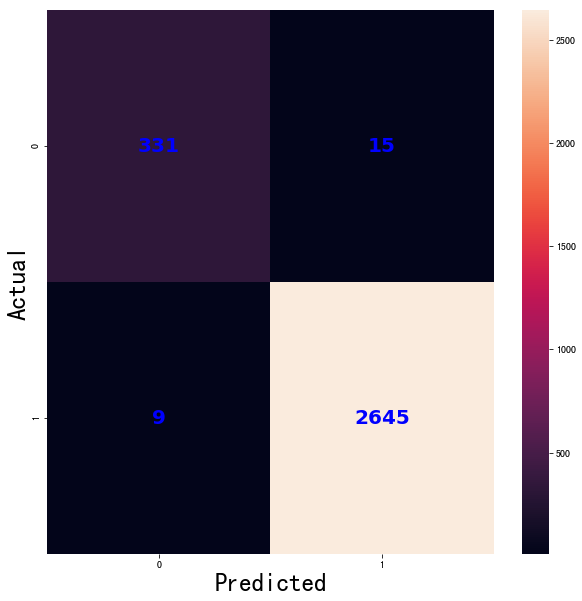

In [22]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

conf_mat = confusion_matrix(df['label'].values[test_indices],y_pred, labels = [0,1])
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True,annot_kws={'size':20,'weight':'bold', 'color':'blue'}, fmt='d',
           xticklabels=set(df.label.values), yticklabels=set(df.label.values))
plt.ylabel('Actual', fontsize = 25)
plt.xlabel('Predicted',fontsize = 25)
plt.show()

#热力图官方文档：http://seaborn.pydata.org/generated/seaborn.heatmap.html，
#中文较为详细的https://blog.csdn.net/m0_38103546/article/details/79935671

In [23]:
from sklearn import metrics
print(metrics.classification_report(df['label'].values[test_indices], y_pred,labels=[0,1]))

             precision    recall  f1-score   support

          0       0.97      0.96      0.97       346
          1       0.99      1.00      1.00      2654

avg / total       0.99      0.99      0.99      3000

